In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import os
import matplotlib.image as mpimg
import random

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sabunbalt","key":"a4a307b915fed712cdee4e9fddddd88e"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sabunbalt/skin-disease-classification

Dataset URL: https://www.kaggle.com/datasets/sabunbalt/skin-disease-classification
License(s): MIT
100% 1.72G/1.72G [01:01<00:00, 32.9MB/s]
100% 1.72G/1.72G [01:01<00:00, 30.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-disease-classification.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir = "/content/Skin Diseae Classification/train"
test_dir = "/content/Skin Diseae Classification/test"

In [ ]:
for dirpath, dirnames, filenames in os.walk(train_dir):
  print(f"'{dirpath.removeprefix('/content/Skin Diseae Classification/train/')}',")

'/content/Skin Diseae Classification/train',
'Warts Molluscum and other Viral Infections',
'Urticaria Hives',
'Seborrheic Keratoses and other Benign Tumors',
'Melanoma Skin Cancer Nevi and Moles',
'Systemic Disease',
'Poison Ivy Photos and other Contact Dermatitis',
'Eczema Photos',
'Nail Fungus and other Nail Disease',
'Psoriasis pictures Lichen Planus and related diseases',
'Exanthems and Drug Eruptions',
'Hair Loss Photos Alopecia and other Hair Diseases',
'Tinea Ringworm Candidiasis and other Fungal Infections',
'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
'Light Diseases and Disorders of Pigmentation',
'Scabies Lyme Disease and other Infestations and Bites',
'Bullous Disease Photos',
'Vasculitis Photos',
'Cellulitis Impetigo and other Bacterial Infections',
'Acne and Rosacea Photos',
'Atopic Dermatitis Photos',
'Lupus and other Connective Tissue diseases',
'Vascular Tumors',
'Herpes HPV and other STDs Photos',


In [ ]:
CLASS_NAMES = ['Vascular Tumors',
'Herpes HPV and other STDs Photos',
'Bullous Disease Photos',
'Eczema Photos',
'Vasculitis Photos',
'Lupus and other Connective Tissue diseases',
'Cellulitis Impetigo and other Bacterial Infections',
'Warts Molluscum and other Viral Infections',
'Melanoma Skin Cancer Nevi and Moles',
'Atopic Dermatitis Photos',
'Scabies Lyme Disease and other Infestations and Bites',
'Hair Loss Photos Alopecia and other Hair Diseases',
'Exanthems and Drug Eruptions',
'Psoriasis pictures Lichen Planus and related diseases',
'Urticaria Hives',
'Systemic Disease',
'Tinea Ringworm Candidiasis and other Fungal Infections',
'Poison Ivy Photos and other Contact Dermatitis',
'Nail Fungus and other Nail Disease',
'Light Diseases and Disorders of Pigmentation',
'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
'Seborrheic Keratoses and other Benign Tumors',
'Acne and Rosacea Photos']

In [ ]:
len(CLASS_NAMES)

23

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed = 69)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed = 69)

Found 15557 files belonging to 23 classes.
Found 4002 files belonging to 23 classes.


In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

Image shape: (479, 720, 3)


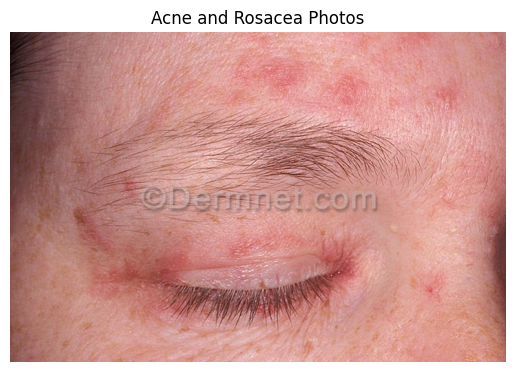

In [ ]:
view_random_image("/content/Skin Diseae Classification/train/", "Acne and Rosacea Photos")

In [ ]:
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor = 'val_accuracy',
                                            verbose = 0,
                                            save_best_only = True)

In [ ]:
def plot_loss_curves(history):

  # Loss curves
  plt.plot(history.history['loss'], label = 'train')
  plt.plot(history.history['val_loss'], label = 'test')
  plt.title('Loss curves')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  #Accuracy curves
  plt.figure()
  plt.plot(history.history['accuracy'], label = 'train')
  plt.plot(history.history['val_accuracy'], label = 'test')
  plt.title('Accuracy curves')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## Model 1: Simple CNN architechture

In [ ]:
inputs = layers.Input(shape = (224, 224, 3), name = 'input_layer')

x = layers.Conv2D(filters = 64, kernel_size= 3, activation = 'relu')(inputs)
x = layers.MaxPool2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 64, kernel_size= 3, activation = 'relu')(x)
x = layers.MaxPool2D(pool_size = 2)(x)

x = layers.Flatten()(x)

outputs = layers.Dense(units = len(CLASS_NAMES), activation = 'softmax')(x)

model_1 = tf.keras.Model(inputs, outputs, name = 'model_1')

model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

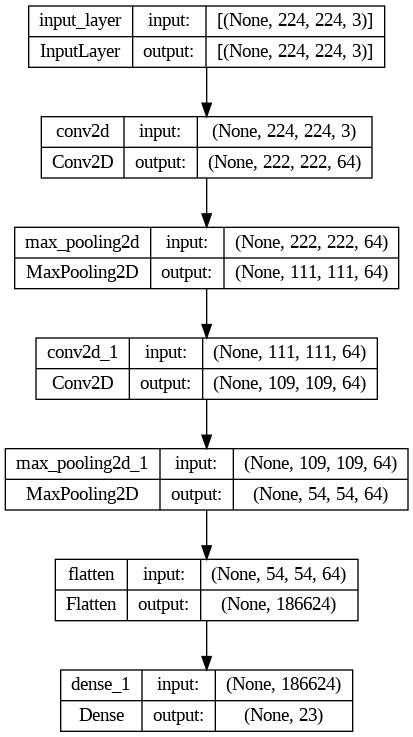

In [ ]:
from keras.utils import plot_model
plot_model(model_1, show_shapes=True)

In [ ]:
model_1_history = model_1.fit(train_data,
                              epochs = 5,
                              validation_data = test_data,
                              callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/5
487/487 [==============================] - 61s 115ms/step - loss: 10.5061 - accuracy: 0.1243 - val_loss: 2.9802 - val_accuracy: 0.1274
Epoch 2/5
487/487 [==============================] - 62s 124ms/step - loss: 2.7288 - accuracy: 0.2051 - val_loss: 3.0530 - val_accuracy: 0.1364
Epoch 3/5
487/487 [==============================] - 54s 110ms/step - loss: 2.3811 - accuracy: 0.3055 - val_loss: 3.5515 - val_accuracy: 0.1477
Epoch 4/5
487/487 [==============================] - 57s 115ms/step - loss: 2.1663 - accuracy: 0.3721 - val_loss: 3.8627 - val_accuracy: 0.1504
Epoch 5/5
487/487 [==============================] - 55s 111ms/step - loss: 2.0132 - accuracy: 0.4214 - val_loss: 4.3907 - val_accuracy: 0.1589


In [ ]:
model_1 = tf.keras.models.load_model('/content/model_experiments/model_1')
model_1.evaluate(test_data)

126/126 [==============================] - 10s 76ms/step - loss: 4.3907 - accuracy: 0.1589


[4.390660285949707, 0.1589205414056778]

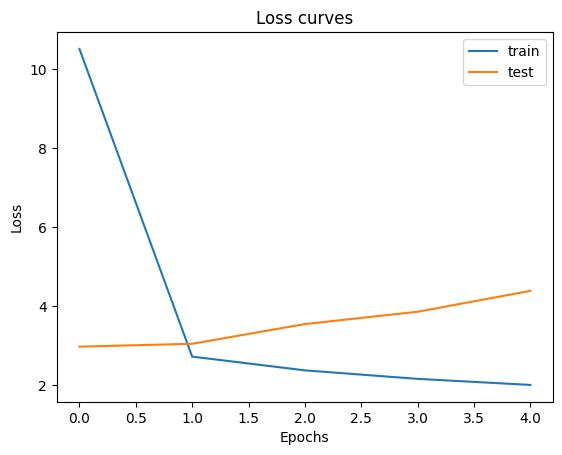

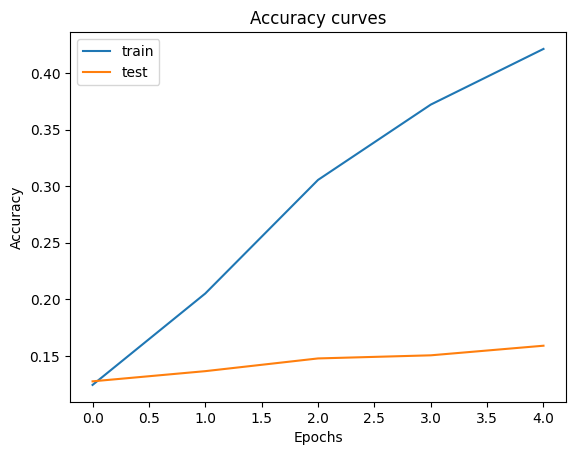

In [ ]:
plot_loss_curves(model_1_history)

## Model 2: Transfer Learning with VGG16 architechture as base model

In [ ]:
base_model_vgg = tf.keras.applications.VGG16(include_top = False)
base_model_vgg.trainable = False

inputs = layers.Input(shape = (224, 224, 3), name = 'input_layer')

x = base_model_vgg(inputs, training = False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(units = len(CLASS_NAMES), activation = 'softmax')(x)

model_2 = tf.keras.Model(inputs, outputs, name = 'model_2_vgg')

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

58889256/58889256 [==============================] - 2s 0us/step


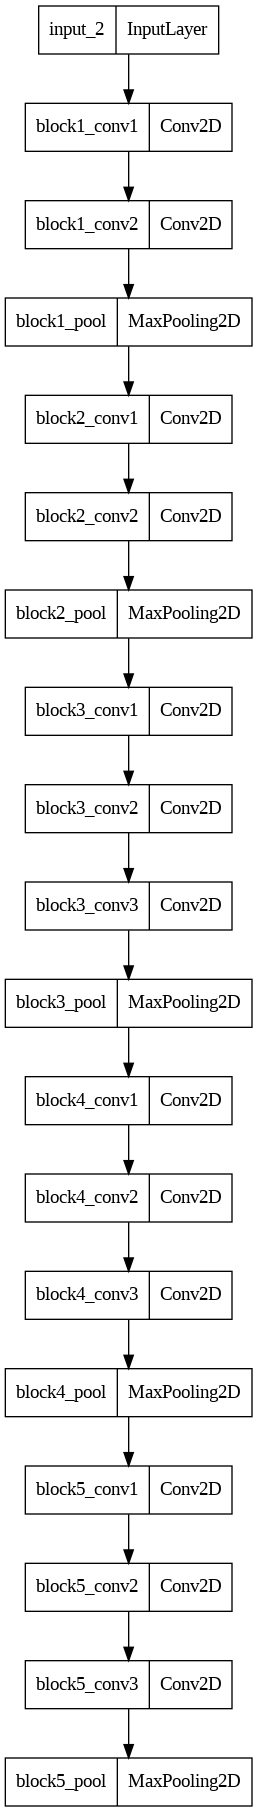

In [ ]:
plot_model(base_model_vgg)

In [ ]:
model_2_history = model_2.fit(train_data,
                              epochs = 5,
                              validation_data = test_data,
                              callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/5
487/487 [==============================] - 94s 177ms/step - loss: 4.2495 - accuracy: 0.1880 - val_loss: 3.2505 - val_accuracy: 0.2419
Epoch 2/5
487/487 [==============================] - 83s 170ms/step - loss: 2.8328 - accuracy: 0.2827 - val_loss: 2.8324 - val_accuracy: 0.2809
Epoch 3/5
487/487 [==============================] - 84s 171ms/step - loss: 2.4637 - accuracy: 0.3265 - val_loss: 2.6707 - val_accuracy: 0.3033
Epoch 4/5
487/487 [==============================] - 85s 174ms/step - loss: 2.2780 - accuracy: 0.3595 - val_loss: 2.7422 - val_accuracy: 0.2959
Epoch 5/5
487/487 [==============================] - 83s 169ms/step - loss: 2.1800 - accuracy: 0.3774 - val_loss: 2.6146 - val_accuracy: 0.3098


In [ ]:
model_2 = tf.keras.models.load_model('/content/model_experiments/model_2_vgg')
model_2.evaluate(test_data)

126/126 [==============================] - 17s 130ms/step - loss: 2.6146 - accuracy: 0.3098


[2.6146433353424072, 0.30984508991241455]

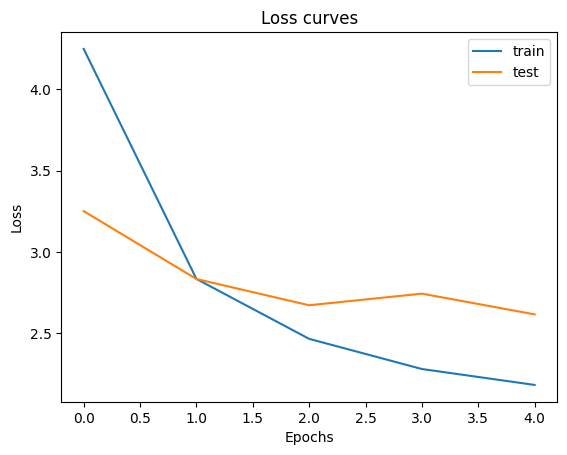

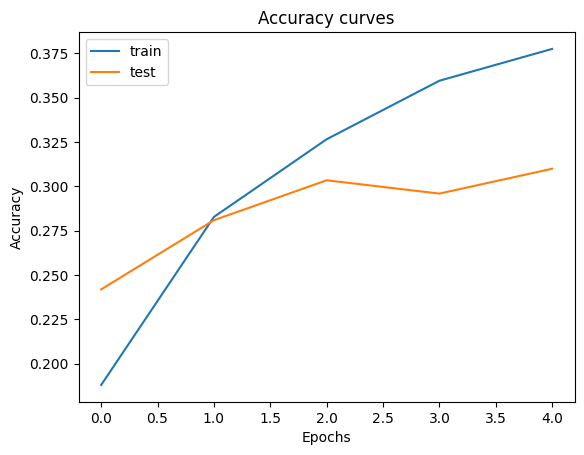

In [ ]:
plot_loss_curves(model_2_history)

## Model 3: Transfer Learning with ResNet50 architechture as base model

In [ ]:
base_model_resnet = tf.keras.applications.ResNet50(include_top = False)
base_model_resnet.trainable = False

inputs = layers.Input(shape = (224, 224, 3), name = 'input_layer')

x = base_model_resnet(inputs, training = False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(units = len(CLASS_NAMES), activation = 'softmax')(x)

model_3 = tf.keras.Model(inputs, outputs, name = 'model_3_resnet')

model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

94765736/94765736 [==============================] - 3s 0us/step


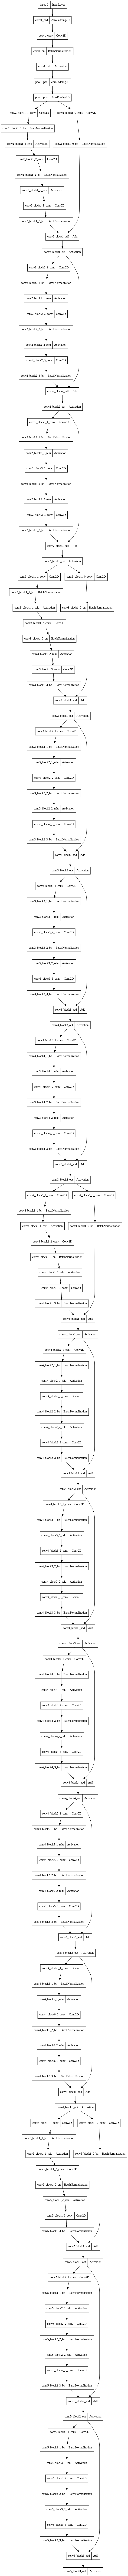

In [ ]:
plot_model(base_model_resnet)

In [ ]:
model_3_history = model_3.fit(train_data,
                              epochs = 5,
                              validation_data = test_data,
                              callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/5
487/487 [==============================] - 90s 172ms/step - loss: 2.5180 - accuracy: 0.2898 - val_loss: 2.3616 - val_accuracy: 0.3298
Epoch 2/5
487/487 [==============================] - 81s 166ms/step - loss: 2.0730 - accuracy: 0.3889 - val_loss: 2.2149 - val_accuracy: 0.3511
Epoch 3/5
487/487 [==============================] - 81s 166ms/step - loss: 1.8850 - accuracy: 0.4357 - val_loss: 2.1149 - val_accuracy: 0.3816
Epoch 4/5
487/487 [==============================] - 65s 132ms/step - loss: 1.7537 - accuracy: 0.4714 - val_loss: 2.1371 - val_accuracy: 0.3813
Epoch 5/5
487/487 [==============================] - 88s 179ms/step - loss: 1.6408 - accuracy: 0.5041 - val_loss: 2.1671 - val_accuracy: 0.3831


In [ ]:
model_3 = tf.keras.models.load_model('/content/model_experiments/model_3_resnet')
model_3.evaluate(test_data)

126/126 [==============================] - 15s 106ms/step - loss: 2.1671 - accuracy: 0.3831


[2.167131185531616, 0.38305845856666565]

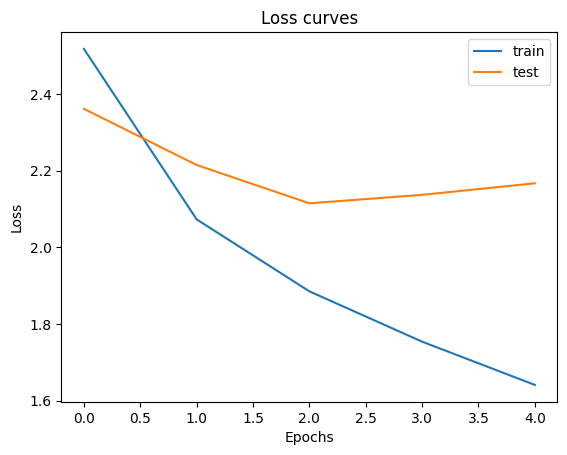

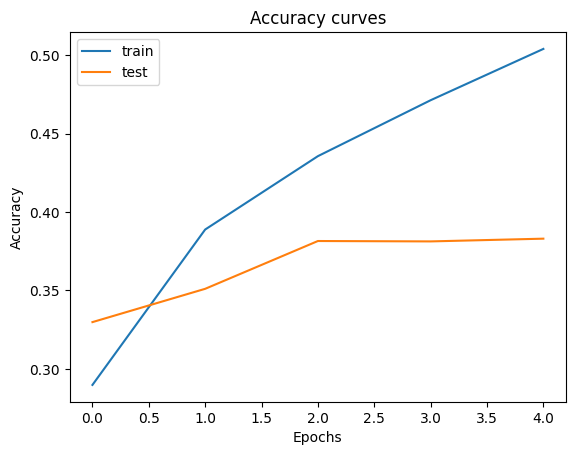

In [ ]:
plot_loss_curves(model_3_history)

## Model 4: Transfer learning with EfficientNetB0 architechture as base mode

In [ ]:
base_model_efficientnet = tf.keras.applications.EfficientNetB0(include_top = False)
base_model_efficientnet.trainable = False

inputs = layers.Input(shape = (224, 224, 3), name = 'input_layer')

x = base_model_efficientnet(inputs, training = False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(units = len(CLASS_NAMES), activation = 'softmax')(x)

model_4 = tf.keras.Model(inputs, outputs, name = 'model_4_efficientnet')

model_4.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

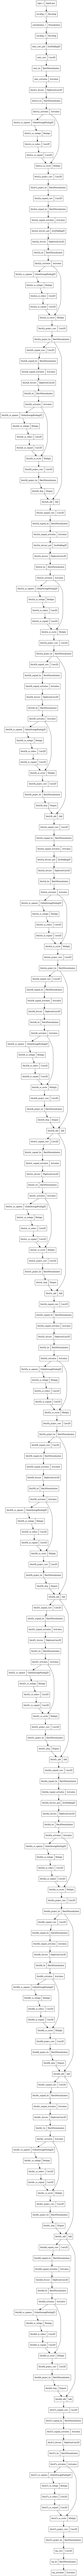

In [ ]:
plot_model(base_model_efficientnet)

In [ ]:
model_4_history = model_4.fit(train_data,
                              epochs = 5,
                              validation_data = test_data,
                              callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/5
487/487 [==============================] - 91s 169ms/step - loss: 2.3402 - accuracy: 0.3078 - val_loss: 2.1643 - val_accuracy: 0.3561
Epoch 2/5
487/487 [==============================] - 78s 159ms/step - loss: 2.0086 - accuracy: 0.3972 - val_loss: 2.0613 - val_accuracy: 0.3881
Epoch 3/5
487/487 [==============================] - 77s 158ms/step - loss: 1.8666 - accuracy: 0.4377 - val_loss: 2.0133 - val_accuracy: 0.3991
Epoch 4/5
487/487 [==============================] - 79s 161ms/step - loss: 1.7703 - accuracy: 0.4690 - val_loss: 1.9790 - val_accuracy: 0.4143
Epoch 5/5
487/487 [==============================] - 78s 160ms/step - loss: 1.6937 - accuracy: 0.4923 - val_loss: 1.9636 - val_accuracy: 0.4160


In [ ]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_efficientnet')
model_4.evaluate(test_data)

126/126 [==============================] - 13s 83ms/step - loss: 1.9636 - accuracy: 0.4160


[1.9635742902755737, 0.4160419702529907]

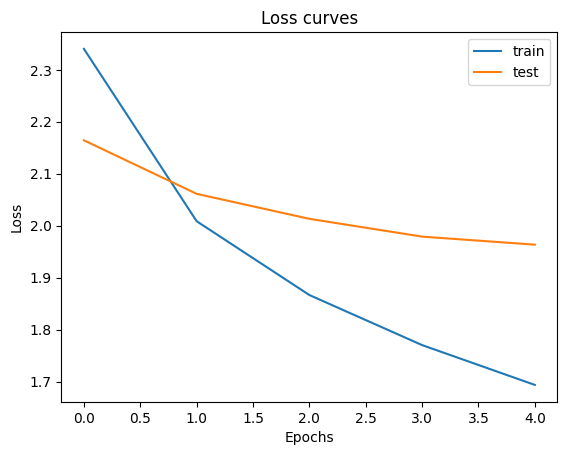

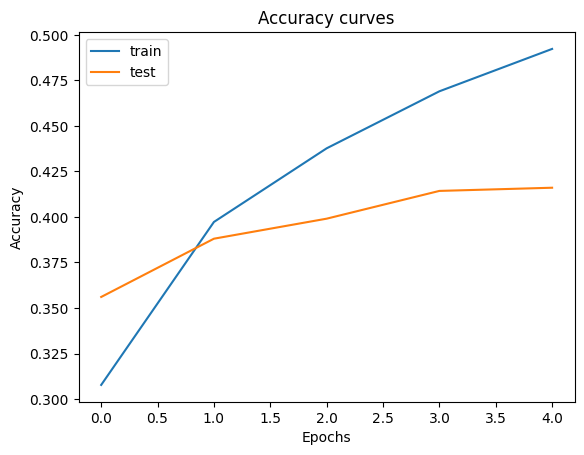

In [ ]:
plot_loss_curves(model_4_history)

## Model 5: Transfer Learning with EfficientNetB4 architechture as base model

In [ ]:
base_model_efficientnetb4 = tf.keras.applications.EfficientNetB4(include_top = False)
base_model_efficientnetb4.trainable = False

inputs = layers.Input(shape = (224, 224, 3), name = 'input_layer')

x = base_model_efficientnetb4(inputs, training = False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(units = len(CLASS_NAMES), activation = 'softmax')(x)

model_5 = tf.keras.Model(inputs, outputs, name = 'model_5_efficientnet4')

model_5.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

71686520/71686520 [==============================] - 2s 0us/step


In [ ]:
model_5_history = model_5.fit(train_data,
                              epochs = 5,
                              validation_data = test_data,
                              callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/5
487/487 [==============================] - 166s 310ms/step - loss: 2.3543 - accuracy: 0.3060 - val_loss: 2.1986 - val_accuracy: 0.3516
Epoch 2/5
487/487 [==============================] - 146s 298ms/step - loss: 2.0536 - accuracy: 0.3865 - val_loss: 2.1149 - val_accuracy: 0.3783
Epoch 3/5
487/487 [==============================] - 94s 191ms/step - loss: 1.9289 - accuracy: 0.4200 - val_loss: 2.0773 - val_accuracy: 0.3761
Epoch 4/5
487/487 [==============================] - 146s 298ms/step - loss: 1.8376 - accuracy: 0.4501 - val_loss: 2.0450 - val_accuracy: 0.3921
Epoch 5/5
487/487 [==============================] - 146s 298ms/step - loss: 1.7676 - accuracy: 0.4695 - val_loss: 2.0274 - val_accuracy: 0.3973


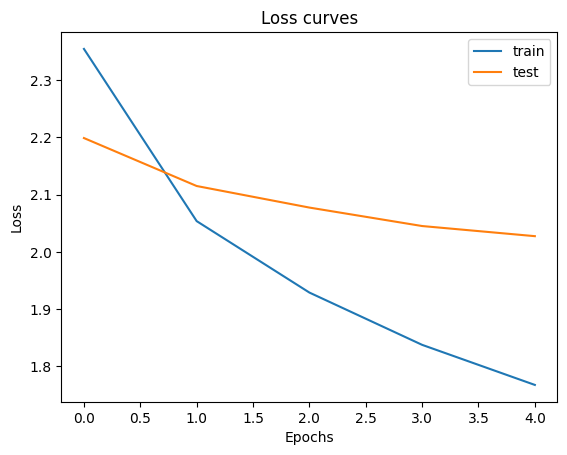

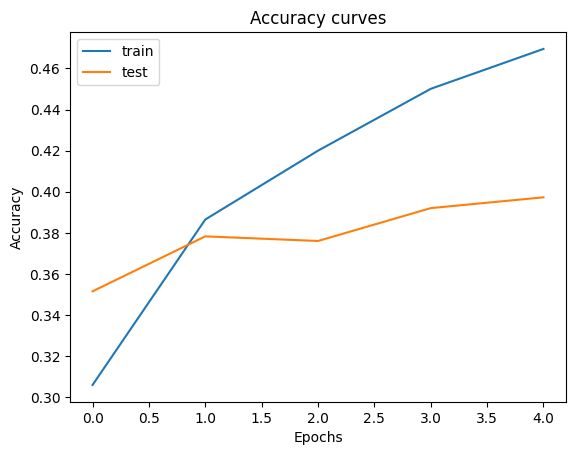

In [ ]:
plot_loss_curves(model_5_history)

In [ ]:
model_5 = tf.keras.models.load_model('/content/model_experiments/model_5_efficientnet4')
model_5.evaluate(test_data)

126/126 [==============================] - 23s 151ms/step - loss: 2.0274 - accuracy: 0.3973


[2.027355194091797, 0.3973013460636139]

## Training the best performing model(model 4) for longer epcochs

In [ ]:
model_4_history = model_4.fit(train_data,
                              epochs = 20,
                              validation_data = test_data,
                              callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/20
487/487 [==============================] - 89s 169ms/step - loss: 1.6357 - accuracy: 0.5087 - val_loss: 1.9406 - val_accuracy: 0.4250
Epoch 2/20
487/487 [==============================] - 83s 169ms/step - loss: 1.5785 - accuracy: 0.5266 - val_loss: 1.9235 - val_accuracy: 0.4300
Epoch 3/20
487/487 [==============================] - 79s 161ms/step - loss: 1.5293 - accuracy: 0.5403 - val_loss: 1.9160 - val_accuracy: 0.4340
Epoch 4/20
487/487 [==============================] - 81s 165ms/step - loss: 1.4901 - accuracy: 0.5533 - val_loss: 1.9078 - val_accuracy: 0.4375
Epoch 5/20
487/487 [==============================] - 77s 158ms/step - loss: 1.4536 - accuracy: 0.5630 - val_loss: 1.8989 - val_accuracy: 0.4405
Epoch 6/20
487/487 [==============================] - 52s 106ms/step - loss: 1.4220 - accuracy: 0.5708 - val_loss: 1.8979 - val_accuracy: 0.4405
Epoch 7/20
487/487 [==============================] - 82s 167ms/step - loss: 1.3922 - accuracy: 0.5824 - val_loss: 1.8993 - val_ac

In [ ]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_efficientnet')
model_4.evaluate(test_data)

126/126 [==============================] - 13s 76ms/step - loss: 1.9257 - accuracy: 0.4540


[1.9256937503814697, 0.45402297377586365]

In [ ]:
model_4.save('/content/model_4_efficientnet_febs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import accuracy_score
imgs, y_true = [], []
for img, label in test_data:
    imgs.append(img)
    y_true.append(label)

imgs = tf.concat(imgs, axis=0)
y_true = np.argmax(tf.concat(y_true, axis=0), axis=1)

y_pred = np.argmax(model_4.predict(imgs), axis=1)
print (accuracy_score(y_true, y_pred))

126/126 [==============================] - 10s 59ms/step
0.4540229885057471


In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model_4.predict(imgs)
roc_auc_score(y_true, y_pred_proba, multi_class='ovr')

126/126 [==============================] - 8s 61ms/step


0.8825450020266732

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
make_confusion_matrix(y_true,
                      y_pred,
                      classes=test_data.class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=test_data.class_names))

                                                                    precision    recall  f1-score   support

                                                   Vascular Tumors       0.35      0.36      0.35       121
                                  Herpes HPV and other STDs Photos       0.41      0.37      0.39       102
                                            Bullous Disease Photos       0.36      0.19      0.24       113
                                                     Eczema Photos       0.39      0.51      0.44       309
                                                 Vasculitis Photos       0.54      0.32      0.40       105
                        Lupus and other Connective Tissue diseases       0.23      0.17      0.20       105
                Cellulitis Impetigo and other Bacterial Infections       0.29      0.14      0.19        73
                        Warts Molluscum and other Viral Infections       0.44      0.45      0.44       272
                           

In [ ]:
classification_report_dict = classification_report(y_true, y_pred, output_dict=True)
classification_report_dict

{'0': {'precision': 0.3524590163934426,
  'recall': 0.35537190082644626,
  'f1-score': 0.35390946502057613,
  'support': 121},
 '1': {'precision': 0.41304347826086957,
  'recall': 0.37254901960784315,
  'f1-score': 0.39175257731958757,
  'support': 102},
 '2': {'precision': 0.3559322033898305,
  'recall': 0.18584070796460178,
  'f1-score': 0.24418604651162792,
  'support': 113},
 '3': {'precision': 0.3944723618090452,
  'recall': 0.5080906148867314,
  'f1-score': 0.4441301272984441,
  'support': 309},
 '4': {'precision': 0.5396825396825397,
  'recall': 0.3238095238095238,
  'f1-score': 0.4047619047619047,
  'support': 105},
 '5': {'precision': 0.23376623376623376,
  'recall': 0.17142857142857143,
  'f1-score': 0.1978021978021978,
  'support': 105},
 '6': {'precision': 0.29411764705882354,
  'recall': 0.136986301369863,
  'f1-score': 0.18691588785046728,
  'support': 73},
 '7': {'precision': 0.43727598566308246,
  'recall': 0.4485294117647059,
  'f1-score': 0.44283121597096187,
  'suppo

In [ ]:
class_f1_scores = {}
for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[test_data.class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'Vascular Tumors': 0.35390946502057613,
 'Herpes HPV and other STDs Photos': 0.39175257731958757,
 'Bullous Disease Photos': 0.24418604651162792,
 'Eczema Photos': 0.4441301272984441,
 'Vasculitis Photos': 0.4047619047619047,
 'Lupus and other Connective Tissue diseases': 0.1978021978021978,
 'Cellulitis Impetigo and other Bacterial Infections': 0.18691588785046728,
 'Warts Molluscum and other Viral Infections': 0.44283121597096187,
 'Melanoma Skin Cancer Nevi and Moles': 0.5535714285714285,
 'Atopic Dermatitis Photos': 0.38862559241706157,
 'Scabies Lyme Disease and other Infestations and Bites': 0.33816425120772947,
 'Hair Loss Photos Alopecia and other Hair Diseases': 0.4460431654676259,
 'Exanthems and Drug Eruptions': 0.38461538461538464,
 'Psoriasis pictures Lichen Planus and related diseases': 0.37426900584795325,
 'Urticaria Hives': 0.38532110091743116,
 'Systemic Disease': 0.39316239316239315,
 'Tinea Ringworm Candidiasis and other Fungal Infections': 0.4351851851851852,
 'Po

In [ ]:
# Classes with least F1 scores
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=True)
f1_scores.head(10)

class_name  f1-score
6   Cellulitis Impetigo and other Bacterial Infect...  0.186916
5          Lupus and other Connective Tissue diseases  0.197802
17     Poison Ivy Photos and other Contact Dermatitis  0.226415
2                              Bullous Disease Photos  0.244186
19       Light Diseases and Disorders of Pigmentation  0.279476
10  Scabies Lyme Disease and other Infestations an...  0.338164
0                                     Vascular Tumors  0.353909
13  Psoriasis pictures Lichen Planus and related d...  0.374269
12                       Exanthems and Drug Eruptions  0.384615
14                                    Urticaria Hives  0.385321

In [ ]:
pred_df = pd.DataFrame({"y_true": y_true,
                        "y_pred": y_pred,
                        "y_true_classname": [test_data.class_names[i] for i in y_true],
                        "y_pred_classname": [test_data.class_names[i] for i in y_pred]})
pred_df.head()

y_true  y_pred                                   y_true_classname  \
0       9      17                           Atopic Dermatitis Photos   
1      21      21       Seborrheic Keratoses and other Benign Tumors   
2      20       8  Actinic Keratosis Basal Cell Carcinoma and oth...   
3      19      22       Light Diseases and Disorders of Pigmentation   
4       7      15         Warts Molluscum and other Viral Infections   

                                 y_pred_classname  
0  Poison Ivy Photos and other Contact Dermatitis  
1    Seborrheic Keratoses and other Benign Tumors  
2             Melanoma Skin Cancer Nevi and Moles  
3                         Acne and Rosacea Photos  
4                                Systemic Disease

In [ ]:
# Getting the wrong predictions
wrong_pred_df = pred_df[pred_df["y_true"] != pred_df["y_pred"]]
wrong_pred_df

y_true  y_pred                                   y_true_classname  \
0          9      17                           Atopic Dermatitis Photos   
2         20       8  Actinic Keratosis Basal Cell Carcinoma and oth...   
3         19      22       Light Diseases and Disorders of Pigmentation   
4          7      15         Warts Molluscum and other Viral Infections   
5         13      12  Psoriasis pictures Lichen Planus and related d...   
...      ...     ...                                                ...   
3993      20      21  Actinic Keratosis Basal Cell Carcinoma and oth...   
3994      17       3     Poison Ivy Photos and other Contact Dermatitis   
3995      21       3       Seborrheic Keratoses and other Benign Tumors   
3997       2      10                             Bullous Disease Photos   
4000      16       7  Tinea Ringworm Candidiasis and other Fungal In...   

                                       y_pred_classname  
0        Poison Ivy Photos and other Contact Dermatitis  
2                   Melanoma Skin Cancer Nevi and Moles  
3                               Acne and Rosacea Photos  
4                                      Systemic Disease  
5                          Exanthems and Drug Eruptions  
...                                                 ...  
3993       Seborrheic Keratoses and other Benign Tumors  
3994                                      Eczema Photos  
3995                                      Eczema Photos  
3997  Scabies Lyme Disease and other Infestations an...  
4000         Warts Molluscum and other Viral Infections  

[2185 rows x 4 columns]